In [2]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from keras.datasets import boston_housing

# 집값 데이터 불러와 변수에 할당
(train_data, train_labels),(test_data, test_labels) = boston_housing.load_data()

# 데이터셋 크기 확인
print(len(train_data))
print(len(test_data))

404
102


In [4]:
train_data.shape # 13개 피처, 404개 데이터

(404, 13)

## 데이터 전처리

In [5]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data - mean
test_data = test_data / std

In [6]:
print((train_data.shape[1], ))
print(len(train_data, ))

(13,)
404


In [7]:
# validation data 분리
from sklearn.model_selection import train_test_split

In [8]:
train_x, val_x, train_y, val_y = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)

## 모델 구성 및 컴파일

In [9]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.

# 입력형태 정의
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

input_shape = (train_data.shape[1], )

# 레이어 쌓기
model = models.Sequential()
model.add(layers.Input(shape=input_shape))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(1))


# 컴파일

model.compile(optimizer='adam',loss = 'mean_squared_error', metrics=['mean_squared_error', 'mae']) # mse(손실 제곱 함의 평균)으로 평가



# 모델 객체 생성한다
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               4200      
                                                                 
 dense_1 (Dense)             (None, 1)                 301       
                                                                 
Total params: 4501 (17.58 KB)
Trainable params: 4501 (17.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 모델학습

In [10]:
history = model.fit(train_x, train_y, validation_data=(val_x, val_y),epochs=40)

Epoch 1/40
11/11 [==============================] - 1s 25ms/step - loss: 594.1087 - mean_squared_error: 594.1087 - mae: 22.4247 - val_loss: 437.7902 - val_mean_squared_error: 437.7902 - val_mae: 19.6808
Epoch 2/40
11/11 [==============================] - 0s 6ms/step - loss: 551.5173 - mean_squared_error: 551.5173 - mae: 21.5115 - val_loss: 406.5663 - val_mean_squared_error: 406.5663 - val_mae: 18.8951
Epoch 3/40
11/11 [==============================] - 0s 5ms/step - loss: 510.3909 - mean_squared_error: 510.3909 - mae: 20.5758 - val_loss: 373.7988 - val_mean_squared_error: 373.7988 - val_mae: 18.0516
Epoch 4/40
11/11 [==============================] - 0s 5ms/step - loss: 464.6922 - mean_squared_error: 464.6922 - mae: 19.5174 - val_loss: 338.1023 - val_mean_squared_error: 338.1023 - val_mae: 17.0914
Epoch 5/40
11/11 [==============================] - 0s 6ms/step - loss: 412.4923 - mean_squared_error: 412.4923 - mae: 18.2650 - val_loss: 299.0223 - val_mean_squared_error: 299.0223 - val_ma

## 시각화

In [11]:
history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'mae', 'val_loss', 'val_mean_squared_error', 'val_mae'])

/var/folders/96/sm2p62h1023c4ytkjcyhc9x40000gn/T/ipykernel_2621/2438909638.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


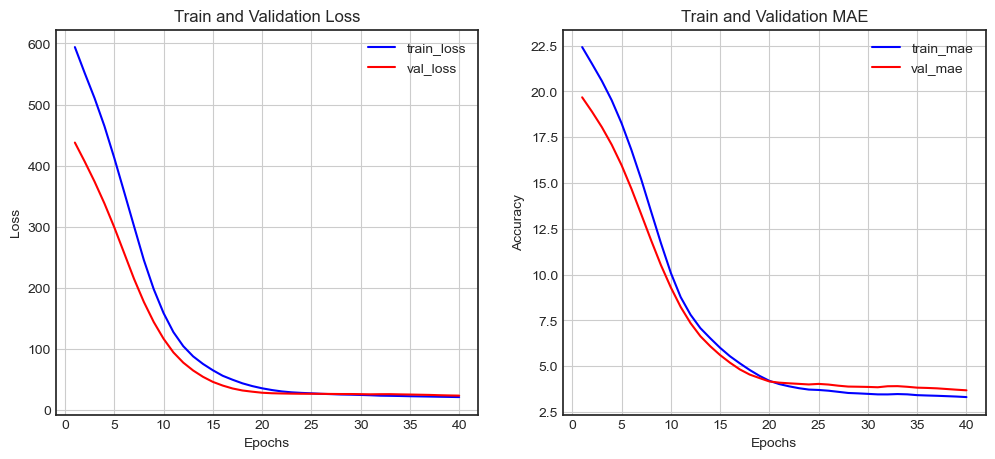

In [12]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가 및 예측

In [13]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 4ms/step - loss: 28.2261 - mean_squared_error: 28.2261 - mae: 4.1302


[28.22609519958496, 28.22609519958496, 4.130202770233154]

In [14]:
predicted_labels = model.predict(test_data)  # 모델을 사용하여 테스트 데이터에 대한 예측값 얻기

4/4 [==============================] - 0s 1ms/step


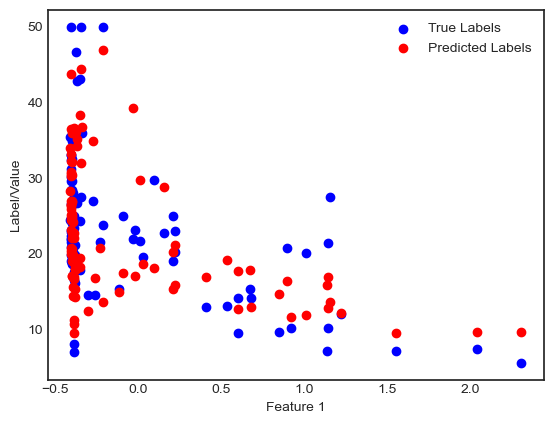

In [15]:
plt.scatter(test_data[:, 0], test_labels, label='True Labels', c='blue')
plt.scatter(test_data[:, 0], predicted_labels, label='Predicted Labels', c='red')
plt.xlabel('Feature 1')
plt.ylabel('Label/Value')
plt.legend()

plt.show()